In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
titanic_df  = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline

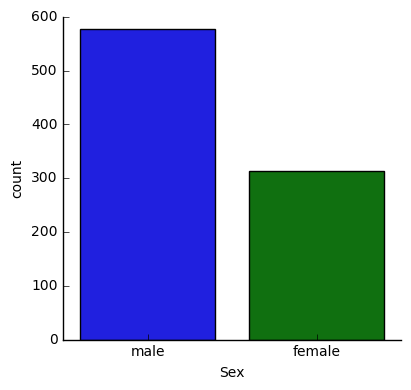

In [7]:
sns.factorplot('Sex',data =titanic_df, kind = 'count')

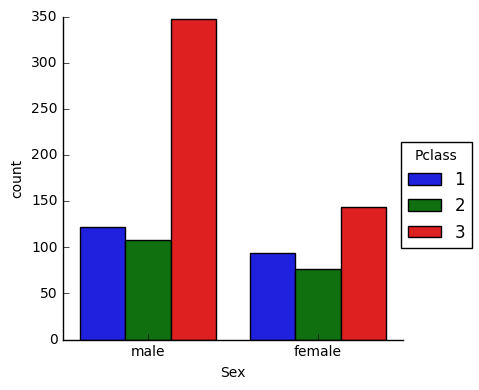

In [8]:
#separate by classes
sns.factorplot('Sex',data = titanic_df, hue='Pclass', kind ='count')

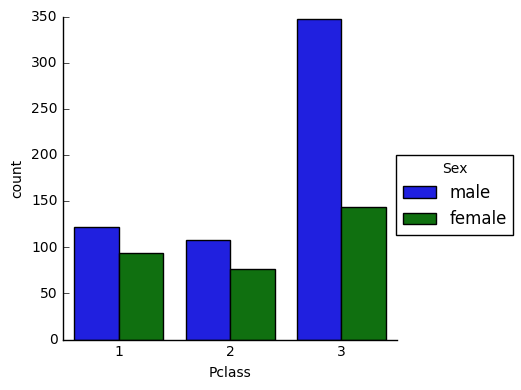

In [9]:
#separate by classes
sns.factorplot('Pclass',data = titanic_df, hue='Sex', kind ='count')

In [10]:
#including children as well
def child_sex_classification(passenger):
    age,sex = passenger
    if age<18:
        return 'child'
    else:
        return sex

In [11]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(child_sex_classification,axis=1)

In [12]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


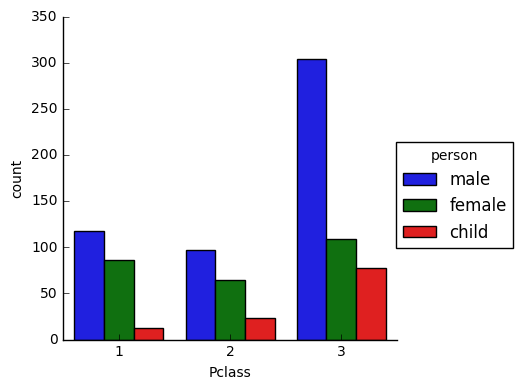

In [13]:
sns.factorplot('Pclass',data =titanic_df,hue = 'person',kind='count')

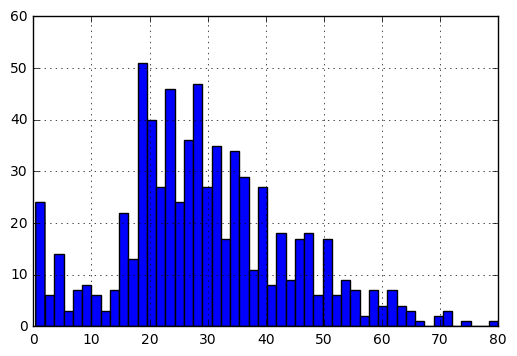

In [14]:
titanic_df['Age'].hist(bins=50)

In [15]:
#finding mean of age
titanic_df['Age'].mean()

29.69911764705882

In [16]:
#counting persons based on sex and childrens
titanic_df['person'].value_counts()

male      519
female    259
child     113
Name: person, dtype: int64

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


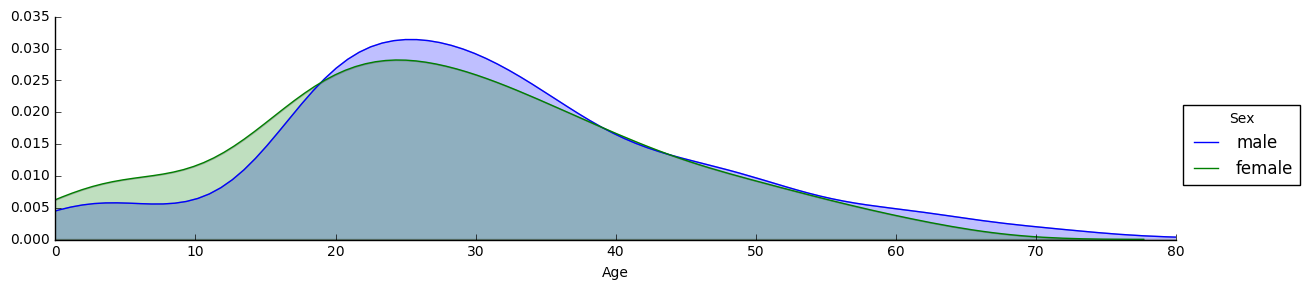

In [17]:
figr = sns.FacetGrid(titanic_df,hue = 'Sex',aspect=4)
figr.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
figr.set(xlim=(0,oldest))
figr.add_legend()

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


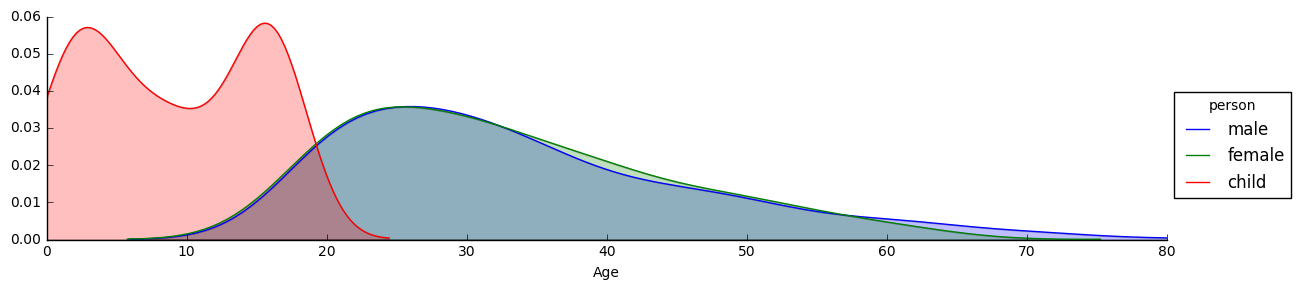

In [18]:
figr = sns.FacetGrid(titanic_df,hue = 'person',aspect=4)
figr.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
figr.set(xlim=(0,oldest))
figr.set(ylim=(0,0.060))
figr.add_legend()

C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


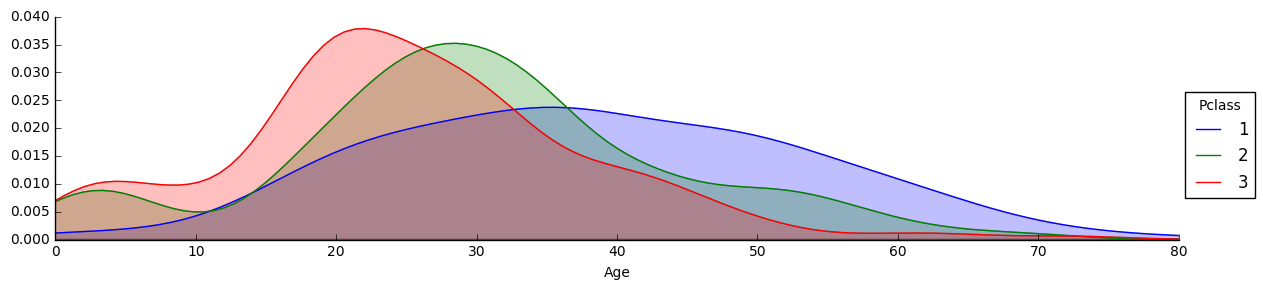

In [19]:
figr = sns.FacetGrid(titanic_df,hue = 'Pclass',aspect=4)
figr.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
figr.set(xlim=(0,oldest))
figr.set(ylim=(0,0.040))
figr.add_legend()

In [20]:
#dropping null values
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
deck = titanic_df['Cabin'].dropna()

In [22]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

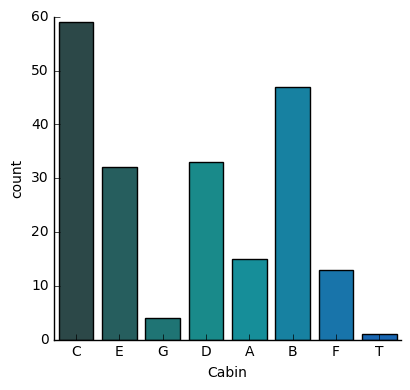

In [23]:
#Levels for cabin 
levels =[]
for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data= cabin_df,palette='winter_d',kind='count')


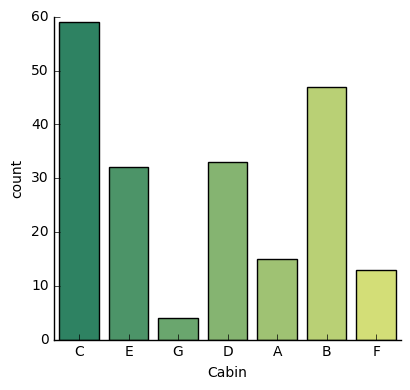

In [24]:
#T is not valid cabin so drop
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data =cabin_df, palette='summer',kind='count')

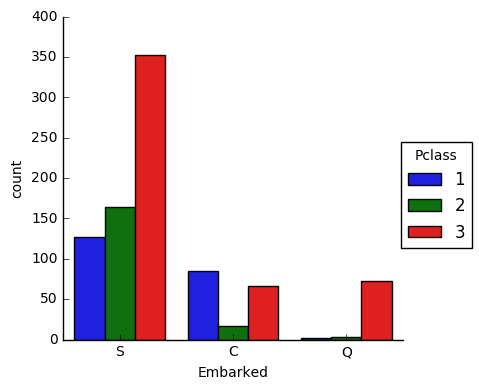

In [25]:
#passenger came from which places
sns.factorplot('Embarked',data = titanic_df,hue='Pclass',kind='count')

In [53]:
#who is alone and with family
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [54]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [55]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'with family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'


C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


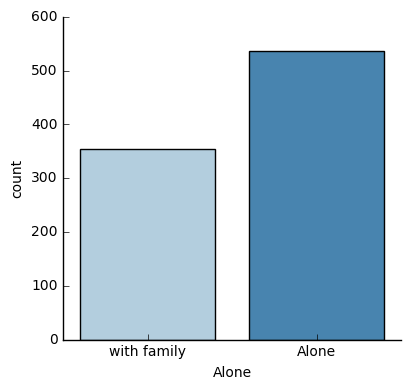

In [30]:
#visualize
sns.factorplot('Alone',data=titanic_df,palette='Blues',kind='count')

In [31]:
#factors for crashing of titanic
titanic_df['Survivor']= titanic_df.Survived.map({0:'no',1:'yes'})

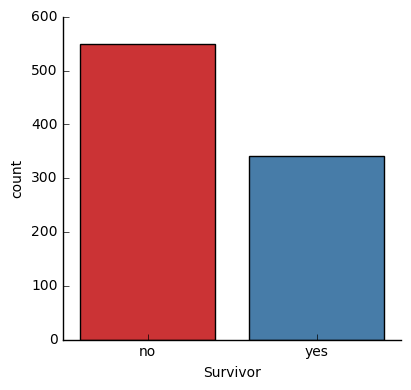

In [32]:
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind ='count')


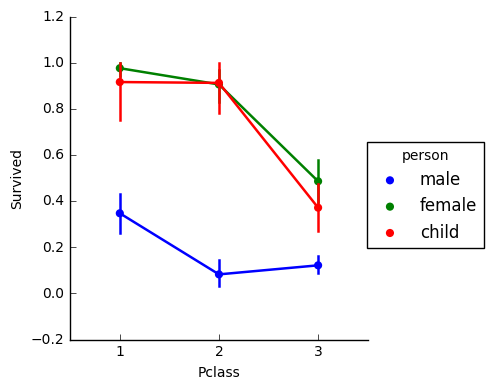

In [33]:
#chances of survival based on class
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

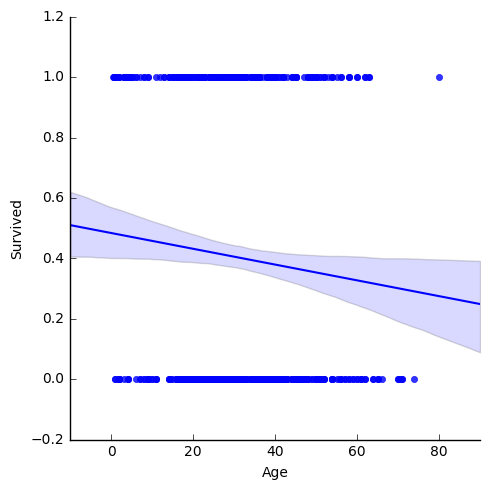

In [34]:
#age wise survival
sns.lmplot('Age','Survived',data=titanic_df)

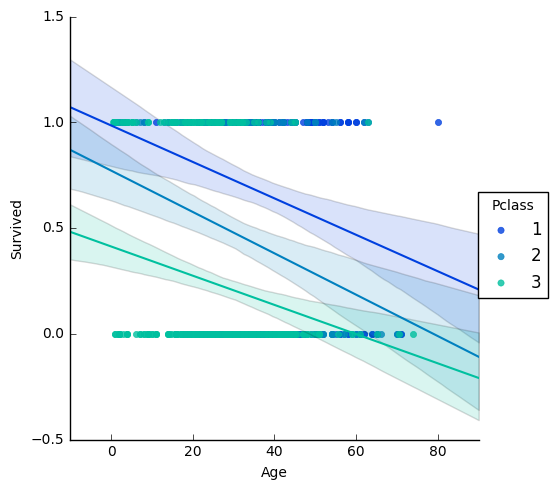

In [35]:
#age wise survival based on class
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

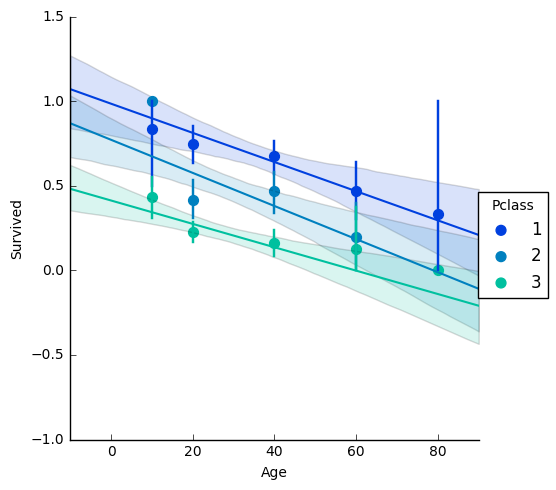

In [36]:
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data= titanic_df,palette = 'winter',x_bins=generations)

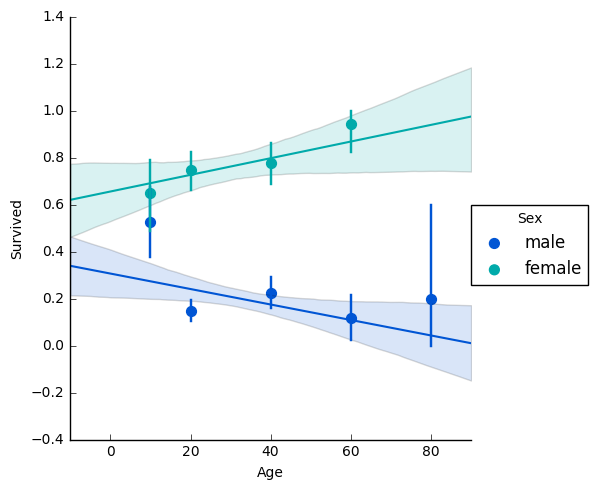

In [47]:
sns.lmplot('Age','Survived',hue='Sex',data= titanic_df,palette = 'winter',x_bins=generations)

1. Did te deck have an effect on passenger survival rate? 
2. did having a family member increase the odds of surviving in the crash

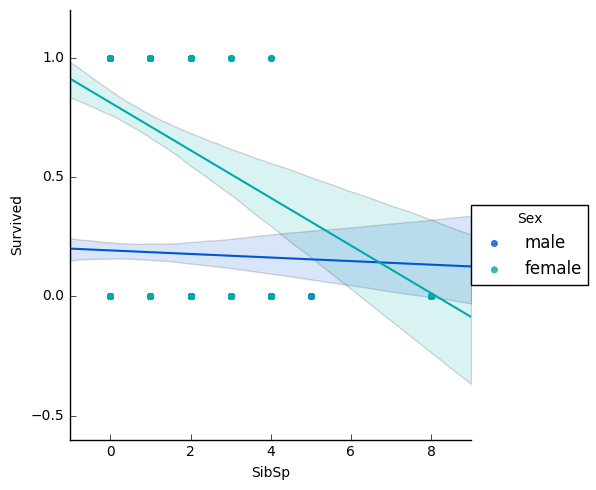

In [58]:
#family members effect on survival
sns.lmplot('SibSp','Survived',hue='Sex',data= titanic_df,palette = 'winter')

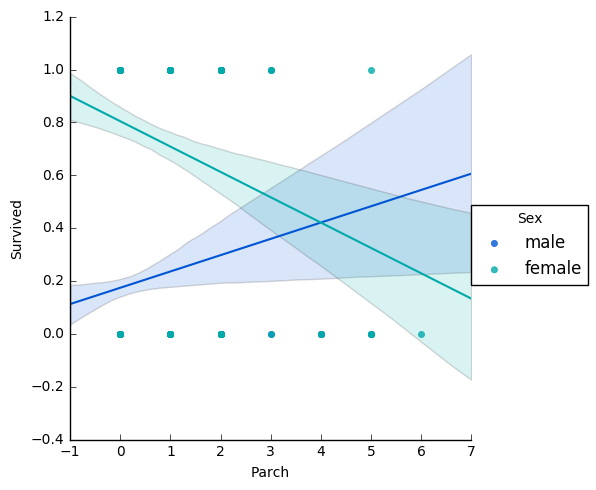

In [59]:
sns.lmplot('Parch','Survived',hue='Sex',data= titanic_df,palette = 'winter')